<h1><center>Data preprocessing </center></h1>

First we import the modules (libraries) required by the code. <br>
Three modules are here included:
- <b>numpy</b>: basic library for array handling and manipulation
- <b>pandas</b>: library to handle I/O of files and data structure manipulation
- <b>matplotlib</b>: data visualization

<p>To increase the code readability, a common approach involves
    using aliases <i>(e.g. import pandas as <ins>pd</ins>)</i>.

In [1]:
#Import the necessary modules and address them using aliases
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we read the training database that was previously stored in
a *Comma Separated Values* file *(.csv)*. <br>
The input format strongly depends on the source that generated
your data.

In [2]:
#Read the training data stored in .csv file
df = pd.read_csv('RESULT_FILES/trainingData.csv',sep=',')

The file is read using the pandas library and it is stored in the <b>df</b> variable of type *dataframe* (a dataframe is a complex type variable that you can think as an Excel spreadsheet). 
The database for this tutorial was formerly cleaned of all the non-relevant columns. <br>
We can inspect the available features through the built-in pandas method: <br>
*df.columns*. <br>
<p> We can now discover if the database was properly read by accessing the first 4 rows
    of the file with their index, using the: <br>
    <i>.iloc[ ]</i> <br>method. In addition, we want also to print the names of the columns by iterating over them.

In [3]:
#On-screen print of the first four rows of the database
print(df.iloc[0:4])
print('\n')

#On-screen print of the database columns
for cname in df.columns:
    print(cname)

   AoA      CL       CD  camber  camber_loc  thickness     Re
0 -2.0 -0.1551  0.01968       1           1          6  50000
1  0.0  0.0572  0.01435       1           1          6  50000
2  2.0  0.2316  0.01576       1           1          6  50000
3  4.0  0.5433  0.01971       1           1          6  50000


AoA
CL
CD
camber
camber_loc
thickness
Re


As previously introduced in the first part of the tutorial, neural networks may be impaired by training data with features having different scales of magnitude and outliers. We can inspect the raw dataset statistics using the pandas built-in function *pd.describe()*.

In [4]:
print(df.describe())

               AoA           CL           CD       camber   camber_loc  \
count  2276.000000  2276.000000  2276.000000  2276.000000  2276.000000   
mean      6.801406     0.730679     0.049028     2.438049     2.564148   
std       5.727368     0.432466     0.057540     1.113408     1.102571   
min      -2.000000    -0.303300     0.000000     1.000000     1.000000   
25%       2.000000     0.439675     0.012960     1.000000     2.000000   
50%       6.000000     0.785800     0.023260     2.000000     3.000000   
75%      12.000000     1.024275     0.056023     3.000000     4.000000   
max      16.000000     1.791900     0.240400     4.000000     4.000000   

         thickness              Re  
count  2276.000000     2276.000000  
mean      9.172232   324670.474517  
std       2.205337   369217.915854  
min       6.000000    50000.000000  
25%       8.000000    50000.000000  
50%      10.000000   100000.000000  
75%      12.000000   250000.000000  
max      12.000000  1000000.000000  


A common and compact way to visualize the staistics of data are box plots,
showing the data distribution with their quantiles. <br>
On way of doing that is the build-in pandas method: *boxplot()*

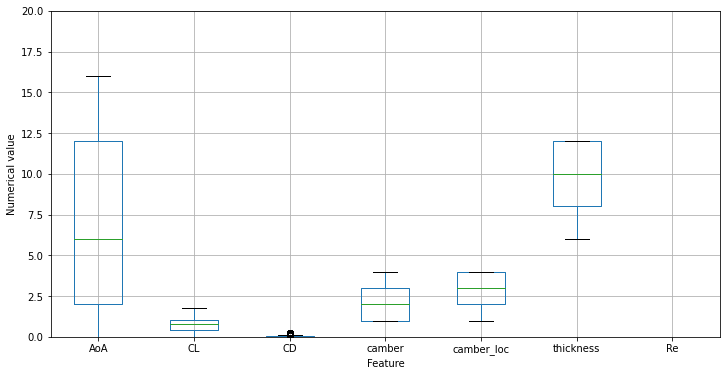

In [5]:
#Generates a new figure
plt.figure(figsize=(12,6))

#Box plot using pandas 
df.boxplot()

#Add labels to the axes
plt.xlabel('Feature')
plt.ylabel('Numerical value')
plt.ylim(0,20)

#Show figure
plt.show()

<b> It is evident that each feature differs significantly in  magnitude and mean with respect to the others. </b><br>

<br>In general, data regularization/standardization is often beneficial for the neural netwrk training. <br>
Here we scale data according to one of the simplest criterion, called
 *minMax scaler*, that regularize features by bounding all the features between 0 and 1: <br><center>
 $\hat{x}=\frac{x-{x}_{min}}{x_{max}-{x}_{min}}$
 </center>
 where:
 - $\hat{x}$ is the normalized feature vector
 - $x$ is the dimensional feature vector
 - $min$ and $max$ are the minimum and the maximum of the feature vector respectively
 To do so, we can use a for loop to scroll through the columns (features), iteratively computing the minimum and the maximum and eventually normalize data:

In [6]:
#Minmax normalization
for cname in df.columns:
    df[cname] = (df[cname]-df[cname].min())/(df[cname].max()-df[cname].min())

We can also statistically describe, as done for the raw dataset, the normalized data:

In [7]:
#Computes basic statistics of the normalized data and print that on the screen 
stats = df.describe()
print(stats)

               AoA           CL           CD       camber   camber_loc  \
count  2276.000000  2276.000000  2276.000000  2276.000000  2276.000000   
mean      0.488967     0.493499     0.203944     0.479350     0.521383   
std       0.318187     0.206408     0.239350     0.371136     0.367524   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.222222     0.354608     0.053910     0.000000     0.333333   
50%       0.444444     0.519807     0.096755     0.333333     0.666667   
75%       0.777778     0.633627     0.233039     0.666667     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         thickness           Re  
count  2276.000000  2276.000000  
mean      0.528705     0.289127  
std       0.367556     0.388650  
min       0.000000     0.000000  
25%       0.333333     0.000000  
50%       0.666667     0.052632  
75%       1.000000     0.210526  
max       1.000000     1.000000  


Let's see now what the normalized *boxplots* look like

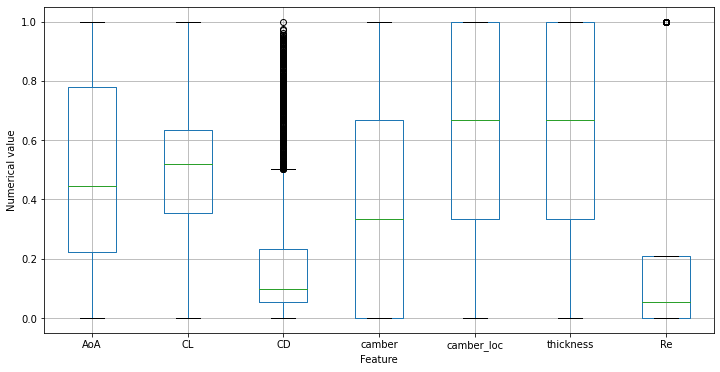

In [8]:
#Generates a new figure
plt.figure(figsize=(12,6))

#Box plot using pandas 
df.boxplot()

#Add labels to the axes
plt.xlabel('Feature')
plt.ylabel('Numerical value')

#Show figure
plt.show()

After regularization, the features are limited between 0 and 1.
<br> The subsequent step is to divide data between the *train* and
*test* subsets. <br>To do so, we use another library, called
*scikit-learn*, and its method *train_test_split*. <br>
In addition, this utility automatically splits the existing features
between **input** or **output**.
<br> The database that we are using is already ordered to have the
last two columns that correspond to the output. <br>
The *train_test_split* function requires as arguments the input and
output features and the relative sizes of the two splits. <br>
Depending on the application, the training/test size ratio may change,
however we use 70% of the dataset as training subsample and 30%
as testing subsample, that includes 2276 entires. <br>
This function returns four arguments:

- **X_train**: training input features, with shape (1594, 5)
- **y_train**: training output features, with shape (1594, 2)
- **X_test**: testing input features, with shape (682, 5)
- **y_test**: testing output features, with shape (682, 2)


In [9]:
#Import of the sklearn train_test_split function
from sklearn.model_selection import train_test_split

#Definition of the input/output features 
df_shape = df.shape
input_features = df[['AoA', 'camber', 'camber_loc', 'thickness', 'Re']]
output_features = df[['CL','CD']]

#Split in train and test data
X_train, X_test, y_train, y_test = train_test_split(
    input_features, output_features, test_size=0.3, random_state=20)


<h1><center>Training a basic model</center></h1>
We are now ready to define the neural network architecture. Several deep learning APIs are available for free, <i> e.g.
Tensorflow, Keras, Pytorch</i>. <br>
In this tutorial we will be using the Keras library.
Several neural network topologies may compete in solving the same kind of problem, and it is not always easy to determine the best solution a priori. <br>
In this case, we will solve this simple problem by using one of the simplest
topology, a feed-forward multi-layer perceptron neural network. <br> We can start importing the necessary modules from the
<i>Keras</i> library, distributed with the <i>tensorflow</i> package:

In [10]:
#import of the tensorflow library
from tensorflow import keras


Finding the best architecture for our neural network is not a trivial task, as it is normally one of the goals of the optimization of the neural network.<br>
In the first part of the tutorial we will train a basic non-optimized morphology. 
<br> We can choose as initial structure a two-layer <b>feed forward neural network</b> with 5 neurons (perceptrons) for each layer. <br>
The number of neurons per layer may be chosen using a rule of thumb: <br>
<centering> $n_\text{neur}=f_\text{out}+0.5*f_\text{in}=2+0.5*5 \simeq 5$ </centering><br>
(number of output features + 0.5 * number of input features)<br>
We can also draw a fast sketch of the structure to understand data flow across the network.


We can also visualize the actual structure of the neural network:
    ![title](img/nn.png)
<centering> 
    *Image generated using NN SVG (http://alexlenail.me/NN-SVG/index.html)*
</centering>

The implementation of the mathematical formulation underlying neural networks may be complex and time consuming. Luckily, most of the
deep-learning APIs like Keras distribute functions that dramatically speed up the process. We can start by defining our simple model through a user-defined function, here called *basic_model*.

In [11]:
# Computes the shape of the input features 
M,N_feat = X_train.shape

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.autograph.set_verbosity(0)
# Definition the basic_model function
def basic_model():
    
    inputs = tf.keras.Input(shape=(5,))

    #Definition of the first hidden layer
    dense = layers.Dense(5, activation="tanh")
    x = dense(inputs)

    #Definition of the second hidden layer
    x = layers.Dense(5, activation="tanh")(x)
    
    outputs = layers.Dense(2, activation="linear")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="Basic_model")

    #Definition of the optimizer
    opt = keras.optimizers.Adam(learning_rate=0.01)

    #Definition of the cost function
    cost = keras.losses.MeanSquaredError()

    #Model finalization
    model.compile(optimizer=opt,loss=cost)

    #Model return
    return model

We can also visualize if the neural network is programmed as expected. To do so,
we can use the *summary()* function of Keras.

In [12]:
print(basic_model().summary())

Model: "Basic_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________
None


In the last three lines of the function definition we are coding three relevant aspect of the neural network:
<ul>
<li>the learning rate (0.01)</li>
<li>the cost function (Mean squared error)</li>
<li>the optimizer (Adam)</li>
</ul>
<br> 
Even if Adam optimizer adapts the learning rate during the training phase, it has an impact on the speed of the algorithm. In fact, it controls the relaxation factor for weight update. Larger values (e.g. 0.3) result in faster initial learning. Smaller values (e.g. 1.0E-5) slow down the weight update during the training phase. </p>
The choice of the cost function (also called loss function), depends mainly on the task (regression or classification). Its role in the neural network is to determine the error that we are making between prediction and true values. <br>
As the gradients of losses are computed based on the cost function, it strongly affects the proper convergence of the optimizer. <br>
In this case we will use a common expression, the Mean Squared Error (MSE) function, defined as: <br><center>
    $\text{MSE}= \frac{\sum_{t=1}^T \left(\hat{y}_1-y\right)^2}{T}$
    </center><br>
    
The optimizer defines how to change weights or learning rates of the neural network to reduce the losses. <br>
Adam optimizer is widely used because of fast convergence and adaptive learning rate.

Now everything is set up to start the training of the neural network. <br> 
To do so, we use the *fit* command. The fit method accepts several arguments that may help or impair the convergence of the model. We want to specify that we want to use X_train and y_train as input/output of the training of the model and that X_test and y_test must be used to evaluate the model. 
<br>
<br>
<b> How to choose the number of epochs? </b><br>
 In this case, we don't want to stop the training of the algorithm too early. In so doing, in fact, we could obtain a suboptimal combination of weight and biases. We want to set the number of trainig epochs to a large number and then code a stopping criterion to interrupt the training when certain conditions are met. This is also called *early stopping*. To do so, we can use a *callback* function already implemented in Keras. In particular, the following command stops the training when the test loss is not improved during five subsequent epochs. 

In [13]:
#Model training
basicModel = basic_model()


#Early stopping criterion definition
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=30, 
                                         min_delta=0.0001,mode='auto')

#Training of the model
history = basicModel.fit(X_train.values, [y_train.values[:,0],y_train.values[:,1]], epochs=2000, validation_data = (X_test, [y_test.values[:,0],y_test.values[:,1]]),
callbacks=callback, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


![title](img/training1.png)

Training and test losses, i.e. the computed MSE, are stored in the *history* variable. The history variable belongs to the *dictionary* type. Dictionaries are Python data structures that can be indexed using their *keys*, inspectable using the *.keys()* command.  

In [14]:
#On screen print of the history dictionary
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


We want to plot both of them in the same figure, to compare the convergence hisotry and enstablish if the model is overfitting or not. 

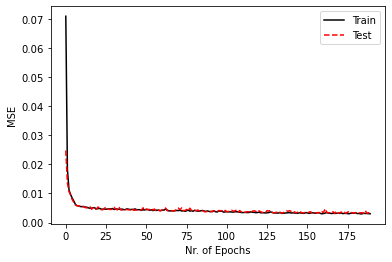

In [15]:
#Creates a new figure
plt.figure()
#Plotter of the training and test MSE
plt.plot(history.history['loss'], c='k',label='Train')
plt.plot(history.history['val_loss'], c='r', label = 'Test', ls='--')
#Shows legend and add labels to the plot
plt.legend()
plt.xlabel('Nr. of Epochs')
plt.ylabel('MSE')
plt.show()

As both series (train and test MSE) are converging, we can assess that the model is behaving correctly in both datasets. Such visualization, however, provides a broad view on the model, without additional information on its local behavior. For example, our artificial intelligence may work correctly within a certain range of the input features while underfitting in the rest of data. As MSE is averaged over the observations, we may not notice such problem and end up with an ill-conditioned model. We can generate a simple plot that compares the predicted output versus the true values for each of the outputs of the model. Let's start with the training data.<br>
We first want to store the predictions of the model for both train and test data in the *y_train_pred* and *y_test_pred* variables: 

In [16]:
#Computes predictions of the model for both train and test datasets
y_train_pred = basicModel.predict(X_train)
y_test_pred = basicModel.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


We can now compare them and see how the model is performing locally. An immediate way is to plot the true outputs of the model on both axes of a graph. In so doing, reference data is represented as a line. The output of the model is instead represented using the true output of the model on one of the axis and the predicted values on the other axis. The error of the model can therefore be visualized as the distance between the predicted points and the solid line. 

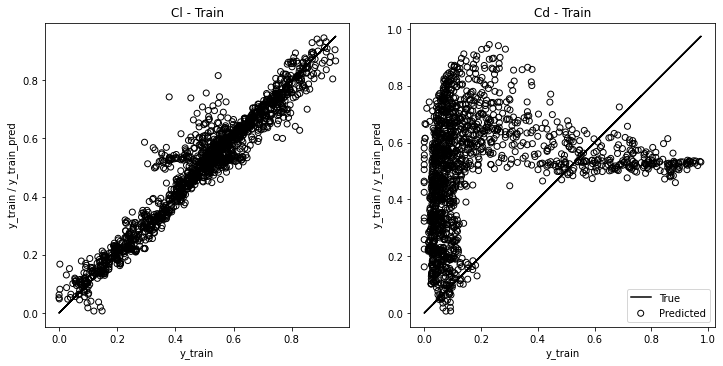

In [17]:
#Creates a new figure with two subplots
fig = plt.figure(figsize=(12,8))

#Cl plot with a 1:1 aspect ratio
ax1 = fig.add_subplot(1,2,1, adjustable='box', aspect=1)
#Plot reference data as a solid black line
ax1.plot(y_train.values[:,0],y_train.values[:,0], c='k')
#Plot model output as black empty circles
ax1.scatter(y_train.values[:,0], y_train_pred[:,0], facecolor = 'none', edgecolor='k')
#Add title and axes labels
ax1.set_title('Cl - Train')
ax1.set_xlabel('y_train')
ax1.set_ylabel('y_train / y_train_pred')

#Cd plot with a 1:1 aspect ratio
ax2 = fig.add_subplot(1,2,2, adjustable='box', aspect=1)
#Plot reference data as a solid black line
ax2.plot(y_train.values[:,1],y_train.values[:,1], c='k', label='True')
#Plot model output as black empty circles
ax2.scatter(y_train.values[:,1], y_train_pred[:,1], facecolor = 'none', edgecolor='k', label='Predicted')
#Add title and axes labels and a legend
ax2.legend()
ax2.set_title('Cd - Train')
ax2.set_xlabel('y_train')
ax2.set_ylabel('y_train / y_train_pred')

plt.show()

Now we can adapt the same lines of code for the test database:

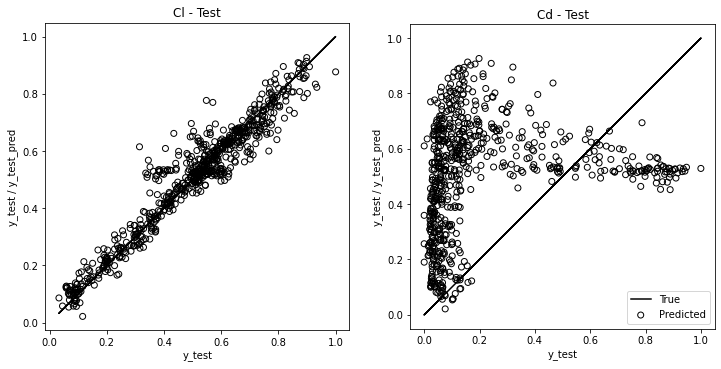

In [18]:
#Creates a new figure with two subplots
fig = plt.figure(figsize=(12,8))

#Cl plot with a 1:1 aspect ratio
ax1 = fig.add_subplot(1,2,1, adjustable='box', aspect=1)
#Plot reference data as a solid black line
ax1.plot(y_test.values[:,0],y_test.values[:,0], c='k')
#Plot model output as black empty circles
ax1.scatter(y_test.values[:,0], y_test_pred[:,0], facecolor = 'none', edgecolor='k')
#Add title and axes labels
ax1.set_title('Cl - Test')
ax1.set_xlabel('y_test')
ax1.set_ylabel('y_test / y_test_pred')

#Cd plot with a 1:1 aspect ratio
ax2 = fig.add_subplot(1,2,2, adjustable='box', aspect=1)
#Plot reference data as a solid black line
ax2.plot(y_test.values[:,1],y_test.values[:,1], c='k', label='True')
#Plot model output as black empty circles
ax2.scatter(y_test.values[:,1], y_test_pred[:,1], facecolor = 'none', edgecolor='k', label='Predicted')
#Add title and axes labels and a legend
ax2.legend()
ax2.set_title('Cd - Test')
ax2.set_xlabel('y_test')
ax2.set_ylabel('y_test / y_test_pred')

plt.show()

It is evident that the errors are large, especially for the drag coefficient. The trained model needs corrections. Several factors may impair the effectiveness of the algorithm. Among them, the initial selection of the hyperparameters of the neural network may be suboptimal to solve this particular task. It is now time to optimize the algorithm. 

<h1><center>Optimizing the model</center></h1>
The optimization phase of the alogrithm is usually a computationally expensive and tedious process. The aim is to find the best combinations of hyperamters to achieve the highest accuracy / least error while making prediction. Depending on the computational costs of the training, we can investigate from tens to thousands possible combination of several hyperparameters and their effect on the neural network. In the simplest optimization, we can manually choose some combinations and hard-code them in the algorithm. However, this non-automatic approach is simply unfeasible for complex architectures. We will hereby use an hyperparameter optimizer already distributed in Keras, called *Keras Tuner*. We will define a search space and find out the best combination of hyperparameters. 
Our goal here is to find the best combination of:

- **number of neurons**, ranging from 4 to 68
- **activation functions**, choosing beetween ReLu and tanh
- **learning rate**, choosing between 1e-2, 1e-3, 1e-4

The first step is to define a dynamic structure of the neural network. In this new function, *model_builder*, the input argument *hp* is provided by the Keras Tuner. The number of neurons is a variable called *hp_units*, defined as integer, that varies from 4 to 32 with a 4 stride. The number of neurons is considered constant along all layers. We have also added a *dropout* layer between each hidden layer to increase the robustness of the model to overfitting. This layer randomly sets input units to 0 with a 30 % frequency of rate at each step during training time. The different acivations are chosen using the function *hp.Choice*, where we specify the availabe options. The same goes for the learning rate, stored in the *hp_learning_rate* variable. 

In [19]:
#Advanced model declaration
def model_builder(hp):
    
    #Declaration of the input tensor
    inputs = tf.keras.Input(shape=(5,))
    
    #Declares the number of neurons to optimize
    hp_units = hp.Int('units', min_value=4, max_value=68, step=8)
    
    #Chooses between relu and tanh for the first layer
    act1 = hp.Choice('act1', values=['relu', 'tanh'])
    
    #Definition of the first hidden layer
    dense = layers.Dense(hp_units, activation=act1)
    x = dense(inputs)
    
    #Adds a dropout layer = 30%
    drop = keras.layers.Dropout(0.3)
    x = drop(x)
    
    #Chooses between relu and tanh for the second layer
    act2 = hp.Choice('act2', values=['relu', 'tanh'])
    
    #Definition of the second hidden layer
    x = layers.Dense(hp_units, activation=act2)(x)
    
    #Adds a dropout layer = 30%
    drop = keras.layers.Dropout(0.3)
    x = drop(x)
    
    #Defines the output layer
    outputs = layers.Dense(2, activation="linear")(x)
    
    #Declaration of the advanced model
    model = keras.Model(inputs=inputs, outputs=outputs, name="Advanced_model")
    
    #Chooses between three possible learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    #Model finalization
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
    loss=keras.losses.MeanSquaredError())
    
    return model

We can now import the required module for the hyperparameter optimization. Among the possible optimizers, we are here using the *Hyperband* algorithm. To reduce the computational costs of training multiple neural network, we are limited the number of epochs to 100 and the maximum number of executions per trial to 3. The metric that is used to optimize the algorithm is the loss computed on the test data. 

In [20]:
#Import of the required module
from kerastuner.tuners import Hyperband

#Definition of the tuner
tuner = Hyperband(
    model_builder,
    max_epochs=100,
    objective='val_loss',
    seed=111,
    executions_per_trial=3,
    )

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


Everything is now set up to run the optimization process. Please notice that the following expression is the same as the *.fit()* function that we previously used.

In [21]:
#Start the hyperband search algoirthm
tuner.search(X_train, y_train, epochs=30, validation_data = (X_test, y_test),verbose=0)


INFO:tensorflow:Oracle triggered exit


After the optimization is finished, we can get the best model with the corresponding hyperparameters by running:

In [22]:
#Gets the best combination of hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

#Gets the best model 
best_model = tuner.get_best_models(num_models=1)[0]



It is also possible to have a summary of the optimization results by simply running <i> tuner.results_summary()<\i> command, that outputs a summary of the best 10 combinations

![title](img/training2.png)

We can now evaluate the performace of the algorithm. by inspecting  the output of the model for both training and test datasets. First, we can calculate and visualize the prediction for the train dataset.

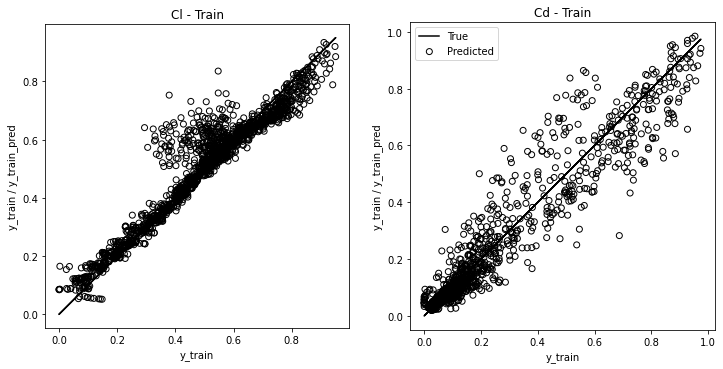

In [25]:
#Stores the output of the trained model
y_train_pred = best_model.predict(X_train)

#Creates a new figure with two subplots
fig = plt.figure(figsize=(12,8))

#Cl plot with a 1:1 aspect ratio
ax1 = fig.add_subplot(1,2,1, adjustable='box', aspect=1)
#Plot reference data as a solid black line
ax1.plot(y_train.values[:,0],y_train.values[:,0], c='k')
#Plot model output as black empty circles
ax1.scatter(y_train.values[:,0], y_train_pred[:,0], facecolor = 'none', edgecolor='k')
#Add title and axes labels
ax1.set_title('Cl - Train')
ax1.set_xlabel('y_train')
ax1.set_ylabel('y_train / y_train_pred')

#Cd plot with a 1:1 aspect ratio
ax2 = fig.add_subplot(1,2,2, adjustable='box', aspect=1)
#Plot reference data as a solid black line
ax2.plot(y_train.values[:,1],y_train.values[:,1], c='k', label='True')
#Plot model output as black empty circles
ax2.scatter(y_train.values[:,1], y_train_pred[:,1], facecolor = 'none', edgecolor='k', label='Predicted')
#Add title and axes labels and a legend
ax2.legend()
ax2.set_title('Cd - Train')
ax2.set_xlabel('y_train')
ax2.set_ylabel('y_train / y_train_pred')

plt.show()

Finally, we can can evaluate the error of the model in the test dataset,

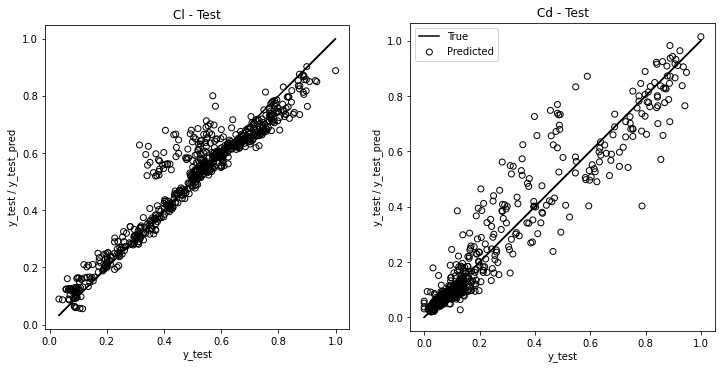

In [24]:
#Evaluates the output of the model on the test data 
y_test_pred = best_model.predict(X_test)

#Creates a new figure with two subplots
fig = plt.figure(figsize=(12,8))

#Cl plot with a 1:1 aspect ratio
ax1 = fig.add_subplot(1,2,1, adjustable='box', aspect=1)
#Plot reference data as a solid black line
ax1.plot(y_test.values[:,0],y_test.values[:,0], c='k')
#Plot model output as black empty circles
ax1.scatter(y_test.values[:,0], y_test_pred[:,0], facecolor = 'none', edgecolor='k')
#Add title and axes labels
ax1.set_title('Cl - Test')
ax1.set_xlabel('y_test')
ax1.set_ylabel('y_test / y_test_pred')

#Cd plot with a 1:1 aspect ratio
ax2 = fig.add_subplot(1,2,2, adjustable='box', aspect=1)
#Plot reference data as a solid black line
ax2.plot(y_test.values[:,1],y_test.values[:,1], c='k', label='True')
#Plot model output as black empty circles
ax2.scatter(y_test.values[:,1], y_test_pred[:,1], facecolor = 'none', edgecolor='k', label='Predicted')
#Add title and axes labels and a legend
ax2.legend()
ax2.set_title('Cd - Test')
ax2.set_xlabel('y_test')
ax2.set_ylabel('y_test / y_test_pred')

plt.show()

Are we done? Not really! We must spend many more efforts to improve the model and the
results, like increasing the training dataset, validating the model against out-of-the-box, testing
different data treatments, etc. etc. However, we can be satisfied as we have derived a good
starting point.